In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

from time import time

%matplotlib inline

In [54]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
df.head()

c:\users\victoriayuzkiv\myenv\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,sentiment
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [55]:
# df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596522 entries, 0 to 1599999
Data columns (total 2 columns):
text         1596522 non-null object
sentiment    1596522 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


# Splitting data

In [56]:
x = df.text
y = df.sentiment

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5)

In [57]:
print("Train size: {} ".format(len(x_train)))
print("Test size: {} ".format(len(x_test)))
print("Validation size: {} ".format(len(x_val)))

Train size: 638608 
Test size: 319305 
Validation size: 638609 


# Feature extraction

In [64]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score: {0:.2f}\n".format(accuracy))
    print("* * * "*10)
    return accuracy

In [65]:
log_reg = LogisticRegression()
features = np.arange(10000,100000,20000)

def feature_accuracy_checker(vectorizer, n_features=features, stop_words=None, ngram_range=(1, 1), classifier=log_reg):
    result = []
    print(classifier)
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("\nValidation result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_val, y_val)
        result.append((n,nfeature_accuracy))
    return result

### Count Vectorizer

In [61]:
cvec = CountVectorizer()

In [66]:
%%time
#Unigram for Count Vectorizer
feature_result_ug = feature_accuracy_checker(cvec)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Accuracy score: 0.79

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 30000 features
Accuracy score: 0.79

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 50000 features
Accuracy score: 0.79

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 70000 features
Accuracy score: 0.79

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 90000 features
Accuracy score: 0.79

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Wall time: 6min 17s


In [68]:
%%time
#Bigram for Count Vectorizer
feature_result_bg = feature_accuracy_checker(cvec, ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 30000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 50000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 70000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 90000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Wall time: 12min 51s


In [69]:
%%time
#Trigram for Count Vectorizer
feature_result_tg = feature_accuracy_checker(cvec,ngram_range=(1, 3))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 30000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 50000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 70000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 90000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Wall time: 22min 11s


### TFIDF Vectorizer

In [70]:
tvec = TfidfVectorizer()

In [71]:
%%time
#Unigram for TFIDF Vectorizer
feature_result_ugt = feature_accuracy_checker(tvec)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 30000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 50000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 70000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 90000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Wall time: 3min 32s


In [72]:
%%time
#Bigram for TFIDF Vectorizer
feature_result_bgt = feature_accuracy_checker(tvec, ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 30000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 50000 features
Accuracy score: 0.82

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 70000 features
Accuracy score: 0.82

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 90000 features
Accuracy score: 0.82

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Wall time: 7min 11s


In [73]:
%%time
#Trigram for TFIDF Vectorizer
feature_result_tgt = feature_accuracy_checker(tvec,ngram_range=(1, 3))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Accuracy score: 0.80

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 30000 features
Accuracy score: 0.81

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 50000 features
Accuracy score: 0.82

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 70000 features
Accuracy score: 0.82

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Validation result for 90000 features
Accuracy score: 0.82

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Wall time: 9min 40s


### Compare results

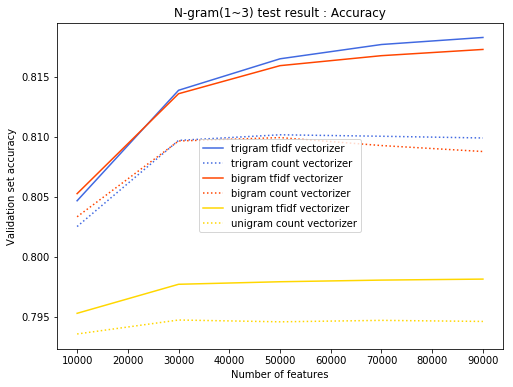

In [76]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy'])

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy'])


plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

Trigram for TFIDF Vectorizer showed the best result, so I'll use it to train the model that predicts teets polarity.